# **Zomato Delivery Análide de dados**

**Análise Exploratória de Dados:** Este notebook realiza uma análise detalhada dos dados, buscando insights relevantes para o negócio e fornecendo informações essenciais para o desenvolvimento do modelo de machine learning.

### Imports

In [ ]:
import os
import pandas as pd
import numpy as np

# -------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import plotly.express as px

# -------------------------

from geopy.distance import geodesic
import gc


In [ ]:
path = os.path.join(os.getcwd(), 'data')

In [ ]:
df = pd.read_csv(os.path.join(path, 'zomato_clean.csv'))
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30750,0xc9ab,KNPRES03DEL01,30.0,4.2,26.469003,80.316344,26.539003,80.386344,2022-02-14,18:10,18:25,Cloudy,Medium,1,Snack,motorcycle,2.0,Yes,Metropolitian,42
30751,0x1178,RANCHIRES16DEL01,35.0,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,21:45,21:55,Windy,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,33
30752,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
30753,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


# **Análise dos dados categóricos**



### Quais os tipos de comida mais pedidos?



In [ ]:
type_order = pd.DataFrame(df.groupby('Type_of_order')['ID'].count()).sort_values(by='ID', ascending=False).reset_index()
type_order

,Type_of_order,ID
0,Drinks,7745
1,Snack,7735
2,Meal,7722
3,Buffet,7553


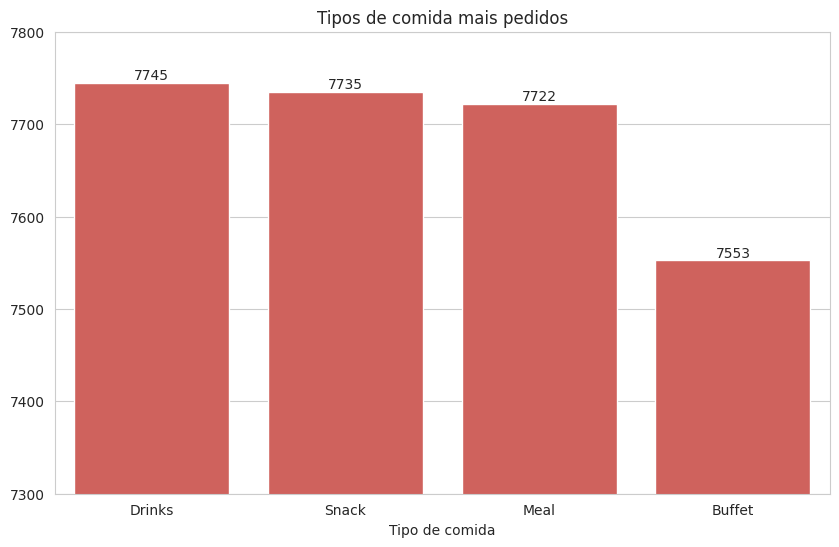

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data= type_order, x='Type_of_order', y='ID', ax=ax)
ax.bar_label(ax.containers[0], labels= type_order['ID'])
plt.ylim(7300, 7800)

plt.title('Tipos de comida mais pedidos')
plt.xlabel('Tipo de comida')
plt.ylabel('')

plt.show()

### Quais os tipos de veículos mais usados?

In [ ]:
type_vehicle = pd.DataFrame(df.groupby('Delivery_person_ID')['Type_of_vehicle'])
type_vehicle.head()

,0,1
0,AGRRES010DEL01,3060 motorcycle 5215 motor...
1,AGRRES010DEL02,1468 motorcycle 6304 motorcycle 6845 ...
2,AGRRES010DEL03,6894 scooter 17480 motor...
3,AGRRES01DEL01,6130 electric_scooter 11902 sc...
4,AGRRES01DEL02,5109 motorcycle 6718 motorcycle 8338 ...


In [ ]:
df[df['Delivery_person_ID'] == 'AGRRES010DEL01']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
3060,0xdebb,AGRRES010DEL01,38.0,4.7,27.163303,78.057044,27.233303,78.127044,2022-02-18,22:45,22:50,Windy,Low,1,Buffet,motorcycle,1.0,No,Urban,28
5215,0xccee,AGRRES010DEL01,21.0,4.7,27.163303,78.057044,27.273303,78.167044,2022-02-16,22:55,23:10,Cloudy,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,22
8361,0xdaa2,AGRRES010DEL01,34.0,4.5,27.163303,78.057044,27.173303,78.067044,2022-02-11,08:25,08:35,Fog,Low,0,Meal,motorcycle,0.0,No,Metropolitian,23
8892,0xdcfa,AGRRES010DEL01,39.0,4.4,27.163303,78.057044,27.203303,78.097044,2022-02-15,13:30,13:40,Windy,High,1,Snack,scooter,1.0,No,Urban,31
10354,0xe0d2,AGRRES010DEL01,25.0,5.0,27.163303,78.057044,27.173303,78.067044,2022-02-15,09:15,09:20,Windy,Low,1,Meal,scooter,0.0,No,Metropolitian,19
16619,0xe035,AGRRES010DEL01,20.0,4.8,27.163303,78.057044,27.233303,78.127044,2022-02-12,22:15,22:20,Fog,Low,1,Meal,motorcycle,0.0,No,Metropolitian,23
19768,0xd416,AGRRES010DEL01,36.0,4.9,27.163303,78.057044,27.203303,78.097044,2022-02-11,13:25,13:30,Cloudy,High,0,Meal,motorcycle,1.0,No,Metropolitian,25
23929,0xc58f,AGRRES010DEL01,34.0,4.6,27.163303,78.057044,27.203303,78.097044,2022-02-13,16:30,16:45,Cloudy,Medium,2,Buffet,electric_scooter,1.0,No,Metropolitian,18
26299,0xc3ec,AGRRES010DEL01,25.0,4.8,27.163303,78.057044,27.203303,78.097044,2022-02-17,14:15,14:20,Stormy,High,0,Buffet,motorcycle,0.0,No,Urban,28




*   Analisando os dados é notável que uma mesma pessoal pode usar diferentes tipos de veículos. Para saber quais os veículos estão sendo mais utilizados, vamos contar apenas o veículo mais recente de cada entregador.



In [ ]:
df['Full_order_date'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Orderd'])
recent_index = df.groupby('Delivery_person_ID')['Full_order_date'].idxmax()

recent_df = df.loc[recent_index]
recent_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Full_order_date
3060,0xdebb,AGRRES010DEL01,38.0,4.7,27.163303,78.057044,27.233303,78.127044,2022-02-18,22:45,...,Windy,Low,1,Buffet,motorcycle,1.0,No,Urban,28,2022-02-18 22:45:00
7287,0xd58d,AGRRES010DEL02,21.0,5.0,27.163303,78.057044,27.293303,78.187044,2022-02-18,22:20,...,Windy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,19,2022-02-18 22:20:00
24886,0xc312,AGRRES010DEL03,34.0,4.7,27.163303,78.057044,27.303303,78.197044,2022-02-18,22:45,...,Windy,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,25,2022-02-18 22:45:00
11902,0xe116,AGRRES01DEL01,34.0,4.7,27.161661,78.011544,27.231661,78.081544,2022-02-18,17:10,...,Sandstorms,Medium,2,Snack,scooter,1.0,No,Metropolitian,23,2022-02-18 17:10:00
9875,0xc851,AGRRES01DEL02,37.0,4.9,27.161661,78.011544,27.291661,78.141544,2022-02-18,21:10,...,Sunny,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,42,2022-02-18 21:10:00


In [ ]:
type_vehicle = pd.DataFrame(df.groupby('Type_of_vehicle')['ID'].count()).sort_values(by='ID', ascending=False).reset_index()
type_vehicle

,Type_of_vehicle,ID
0,motorcycle,18162
1,scooter,10148
2,electric_scooter,2445


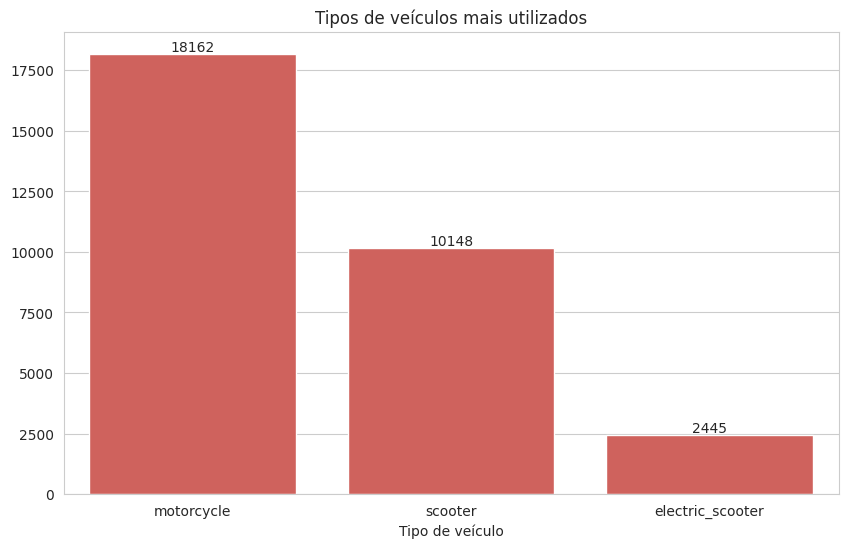

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data= type_vehicle, x='Type_of_vehicle', y='ID', ax=ax)
ax.bar_label(ax.containers[0], labels= type_vehicle['ID'])

plt.title('Tipos de veículos mais utilizados')
plt.xlabel('Tipo de veículo')
plt.ylabel('')

plt.show()

### Qual o tempo médio de entrega por tipo de veículo?

In [ ]:
vehicle_time = pd.DataFrame(df.groupby('Type_of_vehicle')['Time_taken (min)'].median()).sort_values(by='Time_taken (min)', ascending=False).reset_index()
vehicle_time

,Type_of_vehicle,Time_taken (min)
0,motorcycle,27.0
1,electric_scooter,25.0
2,scooter,25.0


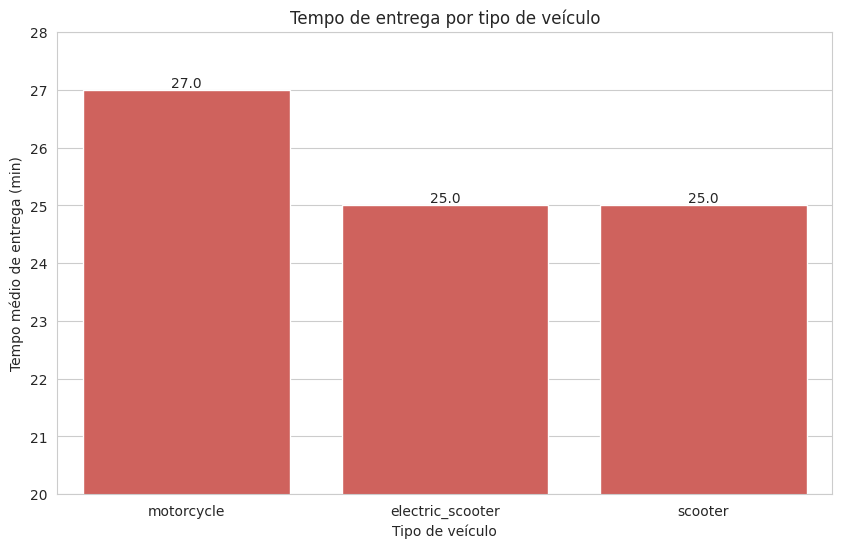

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data= vehicle_time, x='Type_of_vehicle', y='Time_taken (min)', ax=ax)
ax.bar_label(ax.containers[0], labels= vehicle_time['Time_taken (min)'])

plt.ylim(20, 28)
plt.title('Tempo de entrega por tipo de veículo')
plt.xlabel('Tipo de veículo')
plt.ylabel('Tempo médio de entrega (min)')

plt.show()

### Como as condições climáticas impactam o tempo das entregas?



In [ ]:
weather = pd.DataFrame(df.groupby('Weather_conditions')['Time_taken (min)'].median()).sort_values(by='Time_taken (min)', ascending=False).reset_index()
weather

,Weather_conditions,Time_taken (min)
0,Cloudy,29.0
1,Fog,29.0
2,Sandstorms,26.0
3,Stormy,26.0
4,Windy,26.0
5,Sunny,21.0


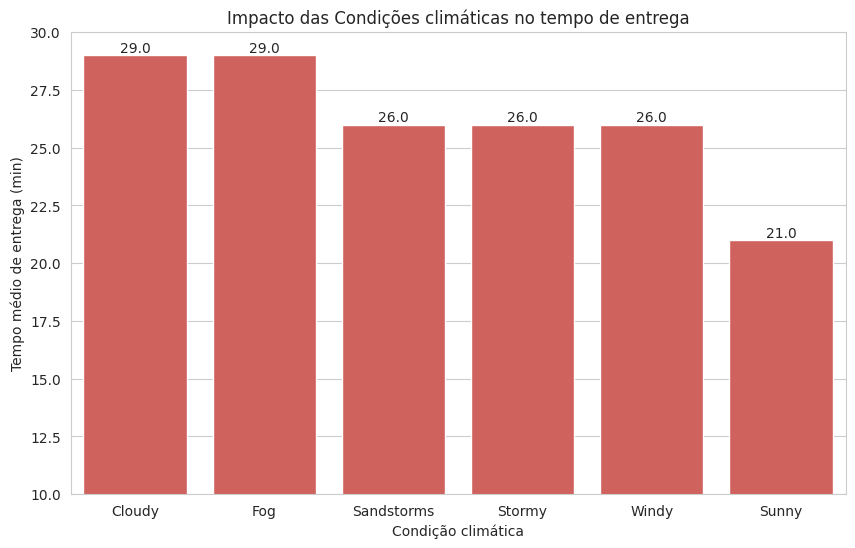

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data= weather, x='Weather_conditions', y='Time_taken (min)', ax=ax)
ax.bar_label(ax.containers[0], labels= weather['Time_taken (min)'])

plt.ylim(10, 30)
plt.title('Impacto das Condições climáticas no tempo de entrega')
plt.xlabel('Condição climática')
plt.ylabel('Tempo médio de entrega (min)')

plt.show()

### Como a densidade de tráfego impacta o tempo das entregas?

In [ ]:
traffic = pd.DataFrame(df.groupby('Road_traffic_density')['Time_taken (min)'].median()).sort_values(by='Time_taken (min)', ascending=False).reset_index()
traffic

,Road_traffic_density,Time_taken (min)
0,Jam,31.0
1,High,27.0
2,Medium,27.0
3,Low,21.0


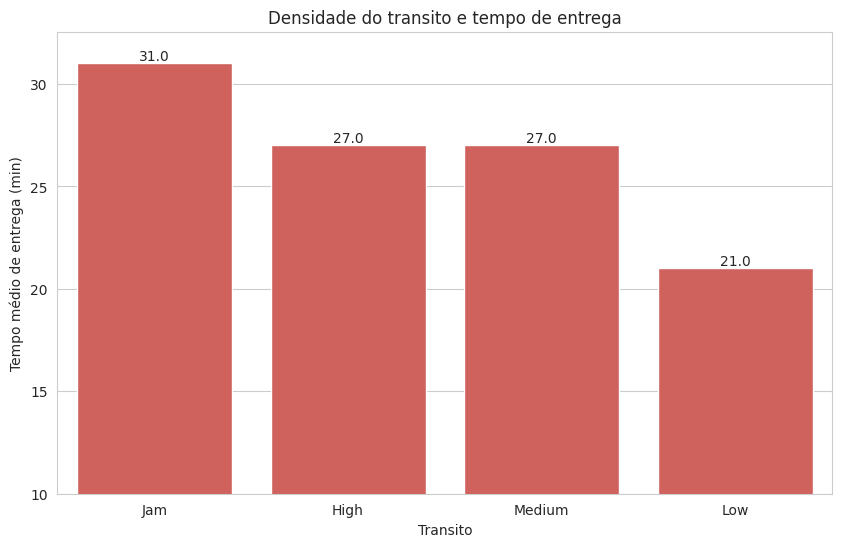

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data= traffic, x='Road_traffic_density', y='Time_taken (min)', ax=ax)
ax.bar_label(ax.containers[0], labels= traffic['Time_taken (min)'])

plt.ylim(10)
plt.title('Densidade do transito e tempo de entrega')
plt.xlabel('Transito')
plt.ylabel('Tempo médio de entrega (min)')

plt.show()

# **Análise Geográfica**

### Qual a distância entre o restaurante e local de entrega?

In [ ]:
df['distance']=np.zeros(len(df))

restaurant_location = df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location = df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

for i in range(len(df)):
    df['distance'].loc[i] = geodesic(restaurant_location[i], delivery_location[i])

df.head()

<ipython-input-17-117b0fe03e43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'].loc[i] = geodesic(restaurant_location[i], delivery_location[i])


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Full_order_date,distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022-02-12 21:55:00,10.27146402322994 km
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022-02-13 14:55:00,6.229376076976667 km
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022-03-04 17:30:00,13.764305929575334 km
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022-02-13 09:20:00,2.9277947281095997 km
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022-02-14 19:50:00,19.37348408863585 km


In [ ]:
dist = pd.DataFrame(df['distance'].astype(str).apply(lambda x: x.split(' ')[0]).astype('float64'))
dist['distance'] = round(dist['distance'], 0).astype(int)
dist.describe()

,distance
count,30755.000000
mean,28.644416
std,311.783843
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,6853.000000


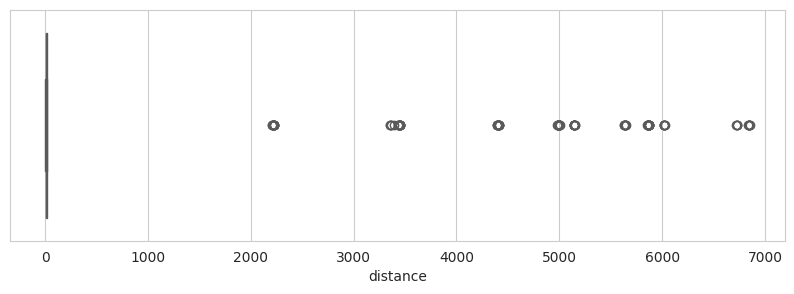

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=dist, x='distance')
plt.show()

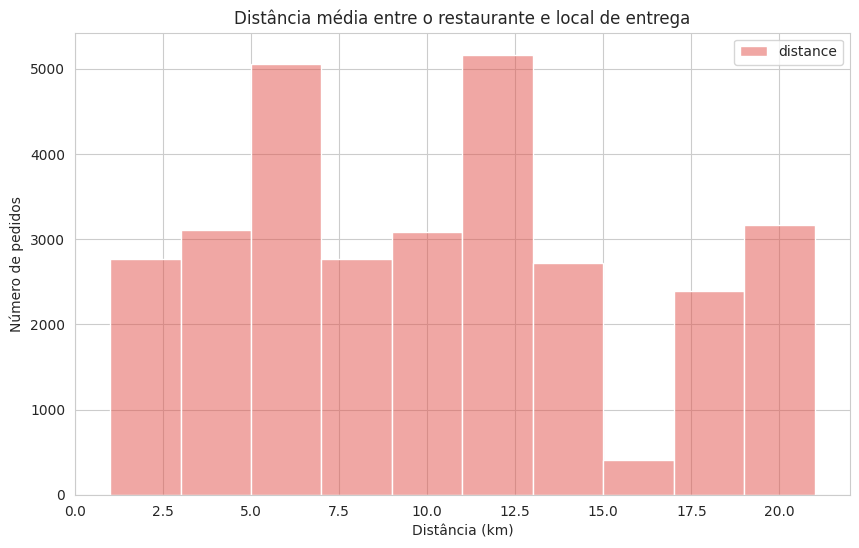

In [ ]:
dist = dist[dist['distance'] < 2000]

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=dist, bins=10, ax=ax)

plt.title('Distância média entre o restaurante e local de entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Número de pedidos')

plt.show()

### Análise da localização das regiões com maior concentração de pedidos
Para isso é preciso primeiro encontrar a localização de cada restaurante único, e contar o número de pedidos naquela localização.

In [ ]:
df_geo = df.copy()
df_geo = pd.DataFrame(df_geo.groupby(['Delivery_location_latitude', 'Delivery_location_longitude'])['ID'].count()).reset_index()

df_geo = df_geo.rename(columns={'ID': 'Count'})

df_geo['Count'] = df_geo['Count'].astype(int)
df_geo.sort_values(by='Count', ascending=False)

,Delivery_location_latitude,Delivery_location_longitude,Count
1475,17.568263,78.527865,17
1044,13.148616,80.354151,17
1798,19.161458,72.897808,16
2203,21.227735,72.838778,16
2293,21.285975,72.905503,16
...,...,...,...
3370,26.493042,80.327833,1
193,10.115697,76.411128,1
3952,30.349528,78.070267,1
3950,30.347968,78.066106,1


In [ ]:
fig = px.scatter_mapbox(df_geo, lat='Delivery_location_latitude', lon='Delivery_location_longitude',
                        color='Count', size='Count', size_max=30,
                        color_continuous_scale='Jet',
                        zoom=4, height=800, width=1000, opacity=0.8)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=dict(text='Localização dos Restaurants e Densidade de Pedidos',
                             font=dict(size=30)))
fig.show()

# plot disponível na imagem 'plotly_geo_plot.png'